In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

# Limpieza

In [132]:
df = pd.read_csv("datasets/paradas-de-colectivo.csv", delimiter=";", encoding="latin1")

### Estaciones Repetidas

In [133]:
print(len(df))
print(len(df.STOP_ID.unique()))

8348
8345


Hay 3 paradas repetidas.

In [134]:
cuenta = df.groupby('STOP_ID').count().X
cuenta[cuenta > 1]

STOP_ID
8385    2
8415    2
9369    2
Name: X, dtype: int64

In [135]:
df[df.STOP_ID == 8385]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
5215,"-58,5239444009942","-34,6226311164",8385,NaN,NaN,NaN,NaN,NaN,{47},NaN,NaN,NaN,94.438.570.312.500.000.000,100.734.773.437.500.000.000,F,NaN,IRIGOYEN&&NAZARRE,USIG,F,8/11/2016
5216,"-58,5239444009942","-34,6226311164",8385,NaN,NaN,NaN,NaN,NaN,{47},NaN,NaN,NaN,94.438.570.312.500.000.000,100.734.773.437.500.000.000,F,NaN,IRIGOYEN&&NAZARRE,USIG,F,19/1/2017


In [136]:
df[df.STOP_ID == 8415]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
5235,"-58,4470126068209","-34,6228873213",8415,NaN,NaN,NaN,NaN,NaN,"{132,25,5,53,85}",NaN,NaN,NaN,101.493.617.187.500.000.000,100.707.945.312.500.000.000,F,NaN,PAYSANDU&&RIVADAVIA AV.,USIG,F,8/11/2016
5236,"-58,4470126068209","-34,6228873213",8415,NaN,NaN,NaN,NaN,NaN,"{132,25,5,53,85}",NaN,NaN,NaN,101.493.617.187.500.000.000,100.707.945.312.500.000.000,F,NaN,PAYSANDU&&RIVADAVIA AV.,USIG,F,19/1/2017


In [137]:
df[df.STOP_ID == 9369]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
5876,"-58,3606460117247","-34,6292825462",9369,NaN,NaN,NaN,NaN,NaN,"{168,25}",NaN,NaN,NaN,109.413.148.437.500.000.000,99.993.875.000.000.000.000,F,NaN,"BLANES, JUAN MANUEL&&BRIN, MINISTRO",USIG,F,8/11/2016
5877,"-58,3606460117247","-34,6292825462",9369,NaN,NaN,NaN,NaN,NaN,"{168,25}",NaN,NaN,NaN,109.413.148.437.500.000.000,99.993.875.000.000.000.000,F,NaN,"BLANES, JUAN MANUEL&&BRIN, MINISTRO",USIG,F,19/1/2017


En los tres casos la hay un registro más nuevo (del 2017) y es el segundo. Vamos a quitar el primero.

In [138]:
df.drop_duplicates('STOP_ID', keep = 'last', inplace = True)

In [139]:
df.head(5)

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
0,"-58,4327908137487","-34,5923809470",1000086,PARADAS CON REFUGIO,CORDOBA AV.,4859,ARMENIA,GURRUCHAGA,"{151,168}",CORDOBA AV. 4859,CORDOBA AV.,4859.0,102.798.829.931.999.000.000,104.091.825.983.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,9/4/2015
1,"-58,5140298647844","-34,6016371880",1005465,PARADA NO OFICIAL,NUEVA YORK,4224,NaN,GUALEGUAYCHU,{105},NUEVA YORK 4224,NUEVA YORK,4224.0,95.346.600.539.799.900.000,103.064.210.534.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015
2,"-58,4497660921390","-34,5544664433",1002096,PARADAS CON REFUGIO,DEL LIBERTADOR AV.,6250,BLANCO ENCALADA,OLAZABAL,"{15,29}",DEL LIBERTADOR AV. 6250,DEL LIBERTADOR AV.,6250.0,101.242.081.519.000.000.000,108.298.117.206.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,10/4/2015
3,"-58,4941044948861","-34,5623407465",1006607,PARADAS CON REFUGIO,"LARRALDE, CRISOLOGO AV.",5187,NaN,NaN,"{110,71}","LARRALDE, CRISOLOGO AV. 5187","LARRALDE, CRISOLOGO AV.",5187.0,97.172.965.995.399.900.000,107.424.229.065.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015
4,"-58,4844741311517","-34,5757583663",1004767,PARADAS DE POSTE,OLAZABAL AV.,4920,NaN,TRIUNVIRATO AV.,{90},OLAZABAL AV. 4920,OLAZABAL AV.,4920.0,98.057.080.321.899.900.000,105.936.009.144.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,14/4/2015


Reemplazamos las ',' por '.' en X e y para que sean coordenadas válidas. 

In [140]:
df.X = df.X.str.replace(",",".")
df.Y = df.Y.str.replace(",",".")

### Paradas sin calle

En la exploración se muestra el detalle, pero muchas paradas no tienen calle, pero tienen una descripción que muestra las calles, aunque no la altura. La mayor parte tiene la calle en la descripción. Las únicas 16 que no tienen calle ni descripción, son algunas paradas del metrobús del norte, que descartaremos.

In [141]:
df.loc[df.CALLE.isnull(), 'CALLE'] = df[df.CALLE.isnull()].STOP_DESC

Eliminamos las que no tienen calle. Esto solo serán los 16 registros antes mencionados.

In [142]:
df = df[~df.CALLE.isnull()]

Además de las de recién, que no tienen número, hay otras también, como las de General Paz, que no tienen número. Les asignaremos la string 'S/N' a todas para uniformar eso y luego procesarlas como NULL en postgresql.

In [143]:
df[df.NUMERO == 'S/N'].head(3)

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
54,-58.5297710906260,-34.6142024940,1004484,PARADAS CON REFUGIO,"PAZ, GRAL. AV. COLECTORA",S/N,MORAN PEDRO,MOLIERE,{124},NaN,NaN,NaN,93.903.610.224.712.000.000,101.669.450.976.785.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,21/4/2015
100,-58.4793259792762,-34.6921603826,1007273,PARADA NO OFICIAL,"PAZ, GRAL. AV. COLECTORA",S/N,SOLDADO JUAN RAVA,ROOSEVELT,{36},NaN,NaN,NaN,98.531.587.874.242.700.000,93.023.173.314.526.800.000,F,NaN,NaN,RELEVAMIENTO2015,T,15/4/2015
105,-58.4661043049065,-34.5369749085,1002714,PARADA NO OFICIAL,DEL LIBERTADOR AV.,S/N,DEHEZA,PICO,{29},NaN,NaN,NaN,99.742.491.854.168.100.000,110.238.563.398.599.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,21/4/2015


In [144]:
df.loc[df.NUMERO.isnull(), 'NUMERO'] = 'S/N'

Creamos una nueva tabla donde cada fila es la correspondencia entre una parada y una línea que pasar por allí.

In [145]:
filas = []

# Separa cada parada en una fila nueva por línea que pasa por allí.
def separar_fila(fila, filas_nuevas):
    lineas = fila.LINEAS[1:-1].split(',')
    for linea in lineas:
        fila_nueva = {'STOP_ID': fila.STOP_ID, 'LINEA': linea}
        filas_nuevas.append(fila_nueva)

df.apply(separar_fila, axis=1, args=(filas,))
lineas_por_parada = pd.DataFrame(filas)

Por el momento exportamos solo los datos necesarios para el punto 1. Esto incluye el id de la parada, las coordenadas, la calle y la altura. Luego iremos limpiando y agregando los otros campos a medida que sean necesarios. 

In [146]:
df[['STOP_ID','X','Y', 'CALLE', 'NUMERO' ]].to_csv('datasets/paradas-de-colectivo-clean.csv', index=False)
lineas_por_parada.to_csv("datasets/lineas_por_parada.csv", index = False)

In [86]:
df_clean = pd.read_csv("datasets/paradas-de-colectivo-clean.csv", delimiter=",", encoding="latin1")

## Clean up adicional para otros campos

Convertimos en bool el metrobus

In [8]:
df.METROBUS = df.METROBUS == 'T'

Convertimos en bool la verificación.

In [9]:
df.VERIFICADA = df.VERIFICADA == 'T'

# Exploración

In [10]:
[x  for x in df.columns]

['X',
 'Y',
 'STOP_ID',
 'TIPO',
 'CALLE',
 'NUMERO',
 'ENTRE1',
 'ENTRE2',
 'LINEAS',
 'DIR_NORM',
 'CALLE_NORM',
 'ALTURA_NOR',
 'COORDX',
 'COORDY',
 'METROBUS',
 'STOP_NAME',
 'STOP_DESC',
 'FUENTE',
 'VERIFICADA',
 'FECHA_ULTI']

In [11]:
df.dtypes

X              object
Y              object
STOP_ID         int64
TIPO           object
CALLE          object
NUMERO         object
ENTRE1         object
ENTRE2         object
LINEAS         object
DIR_NORM       object
CALLE_NORM     object
ALTURA_NOR    float64
COORDX         object
COORDY         object
METROBUS         bool
STOP_NAME      object
STOP_DESC      object
FUENTE         object
VERIFICADA       bool
FECHA_ULTI     object
dtype: object

In [12]:
df.TIPO.unique()

array(['PARADAS CON REFUGIO', 'PARADA NO OFICIAL', 'PARADAS DE POSTE'],
      dtype=object)

In [13]:
df.CALLE.head().unique()

array(['CORDOBA AV.', 'NUEVA YORK', 'DEL LIBERTADOR AV.',
       'LARRALDE, CRISOLOGO AV.', 'OLAZABAL AV.'], dtype=object)

In [14]:
df.NUMERO.hasnans

False

In [15]:
df.LINEAS.head()

0    {151,168}
1        {105}
2      {15,29}
3     {110,71}
4         {90}
Name: LINEAS, dtype: object

`ALTURA_NOR` debería ser int, pero tiene NaNs y eso le causa problemas a pandas.

In [16]:
df.ALTURA_NOR.hasnans

True

In [17]:
df.COORDX.head()

0    102.798.829.931.999.000.000
1     95.346.600.539.799.900.000
2    101.242.081.519.000.000.000
3     97.172.965.995.399.900.000
4     98.057.080.321.899.900.000
Name: COORDX, dtype: object

In [62]:
df.STOP_DESC.unique()

array([nan, 'CABILDO AV.&&RAMALLO', 'DEL LIBERTADOR AV.&&GODOY CRUZ', ...,
       'ROCA, CNEL. AV.&&SALADILLO', '27 DE FEBRERO AV.&&PAZ, GRAL. AV.',
       '27 DE FEBRERO AV.'], dtype=object)

In [64]:
df.FUENTE.unique()

array(['RELEVAMIENTO2015', 'USIG'], dtype=object)

In [1]:
df.FECHA_ULTI.astype?

Object `df.FECHA_ULTI.astype` not found.


### Paradas del Metrobús

Dada la anomalía que detectamos en el punto 2 buscamos las paradas de la línea 60 en la calle Cabildo.

In [4]:
df[(df.LINEAS.str.find('60') != -1) & (df.CALLE=='CABILDO')]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI


Viendo que no aparece ninguna parada, vemos para cualquier línea qué hay en cabildo.

In [36]:
df[(df.CALLE.str.find('CABILDO') != -1) & df.CALLE.notnull()]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
1707,"-58,4386767579233","-34,5731154416",1000792,PARADAS CON REFUGIO,CABILDO AV.,275,"DUMONT, SANTOS",MAURE,{67},CABILDO AV. 275,CABILDO AV.,275.0,102.259.370.641.000.000.000,106.229.149.330.999.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,22/4/2015


Que haya una sola parada en cabildo no es muy razonable, con lo cual confirmamos que el problema reside en que las paradas de metrobús no tienen el atributo calle, pero muchas tienen la calle en la descripción.

In [45]:
df[(df.METROBUS == 'T') & (df.STOP_DESC.str.find('CABILDO') != -1) & (df.STOP_DESC.notnull())]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,CALLE_NORM,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI
14,"-58,4728621391468","-34,5426755288",20427,NaN,NaN,NaN,NaN,NaN,"{168,184,60}",NaN,NaN,NaN,99.122.190.350.905.200.000,109.606.139.679.739.000.000,T,ARIAS,CABILDO AV.&&RAMALLO,USIG,T,30/11/2016
121,"-58,4693256731640","-34,5475995667",20421,NaN,NaN,NaN,NaN,NaN,"{133,57,59,60,68}",NaN,NaN,NaN,99.446.849.478.513.500.000,109.059.932.048.741.000.000,T,MANZANARES,CABILDO AV.&&SAN ISIDRO LABRADOR AV.,USIG,T,12/10/2016
156,"-58,4570022918061","-34,5615820037",20761,NaN,NaN,NaN,NaN,NaN,"{194,57}",NaN,NaN,NaN,100.577.897.203.830.000.000,107.508.831.670.031.000.000,T,JURAMENTO,CABILDO AV.&&JURAMENTO AV.,USIG,T,12/1/2017
911,"-58,4777865363728","-34,5349376199",20435,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,98.670.036.329.836.900.000,110.464.465.957.021.000.000,T,ALSINA,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
915,"-58,4772934124832","-34,5359048553",20434,NaN,NaN,NaN,NaN,NaN,"{130,152,161,19,59,60,71}",NaN,NaN,NaN,98.715.321.401.284.400.000,110.357.175.172.361.000.000,T,LAPRIDA,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
930,"-58,4756242279088","-34,5387563261",20432,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,98.868.593.950.799.000.000,110.040.876.365.635.000.000,T,GRAL PAZ,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
932,"-58,4757836184498","-34,5388316735",20430,NaN,NaN,NaN,NaN,NaN,"{130,152,161,184,19,71}",NaN,NaN,NaN,98.853.963.389.254.500.000,110.032.516.044.752.000.000,T,GRAL PAZ,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
934,"-58,4759126483894","-34,5388881828",20431,NaN,NaN,NaN,NaN,NaN,"{133,152,161,168,184,59,60,68}",NaN,NaN,NaN,98.842.119.601.337.500.000,110.026.245.804.089.000.000,T,GRAL PAZ,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
935,"-58,4760796299295","-34,5389698092",20433,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,NaN,98.826.792.346.386.000.000,110.017.188.789.801.000.000,T,GRAL PAZ,"CABILDO AV.&&PAZ, GRAL. AV.",USIG,T,12/10/2016
949,"-58,4741228924686","-34,5411523235",20429,NaN,NaN,NaN,NaN,NaN,"{161,168,184}",NaN,NaN,NaN,99.006.442.746.197.800.000,109.775.099.821.752.000.000,T,PICO,CABILDO AV.&&PICO,USIG,T,23/1/2017


In [121]:
# Metrobús con calle.
print(len(df[(df.METROBUS == 'T') & (df.CALLE.notnull())]))
# Metrobús con descripción.
print(len(df[(df.METROBUS == 'T') & (df.STOP_DESC.notnull())]))
# Metrobús sin descripción.
print(len(df[(df.METROBUS == 'T') & (df.STOP_DESC.isnull())]))

206
206
0


Efectivamente, ninguna parada del metrobús tiene calle, aunque la mayoría tiene descripción. Solo 16 no tienen tampoco descripción. Veremos cuáles son. Cargaremos un shapefile con el mapa de Buenos Aires y lo proyectamos al espsg 4326, que usa latitud y longitud.

In [91]:
ba_map = gpd.read_file('shapes/callejero-rar/callejero.shp').to_crs({'init':'epsg:4326' })

Seleccionamos las paradas del metrobús sin descripción y las convertimos en un dataframe geométrico de geopandas.

In [128]:
sin_desc = df[(df.METROBUS == 'T') & (df.STOP_DESC.isnull())]
sin_desc.X = pd.to_numeric(sin_desc.X).to_numpy()
sin_desc.Y = pd.to_numeric(sin_desc.Y).to_numpy()
sin_desc = gpd.GeoDataFrame(sin_desc, geometry = [Point(xy) for xy in zip(sin_desc['X'], sin_desc['Y'])])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Ahora ploteamos las paradas sin descripción en relación con las calles de la ciudad.

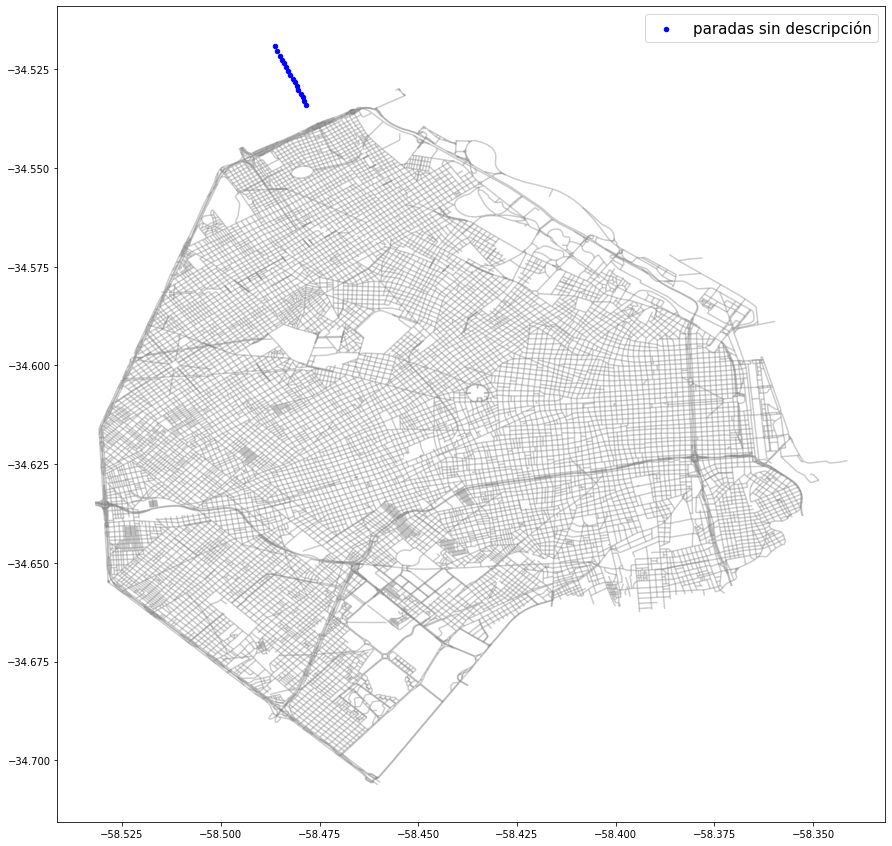

In [129]:
fig, ax = plt.subplots(figsize = (15,15))
ba_map.plot(ax = ax, alpha = 0.4, color="grey")
sin_desc.plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "paradas sin descripción")
plt.legend(prop={'size': 15})

Son ser las paradas del metrobús del norte (Vicente López). Las dejamos fuera del alcance de este trabajo.

## Paradas sin calle

Además del metrobús del norte, qué otras paradas están sin calle? **Explorar**

In [69]:
sin_calle = df[(df.METROBUS == 'F') & (df.CALLE.isnull())]
sin_calle.X = pd.to_numeric(sin_calle.X).to_numpy()
sin_calle.Y = pd.to_numeric(sin_calle.Y).to_numpy()
sin_calle = gpd.GeoDataFrame(sin_calle, geometry = [Point(xy) for xy in zip(sin_calle['X'], sin_calle['Y'])])

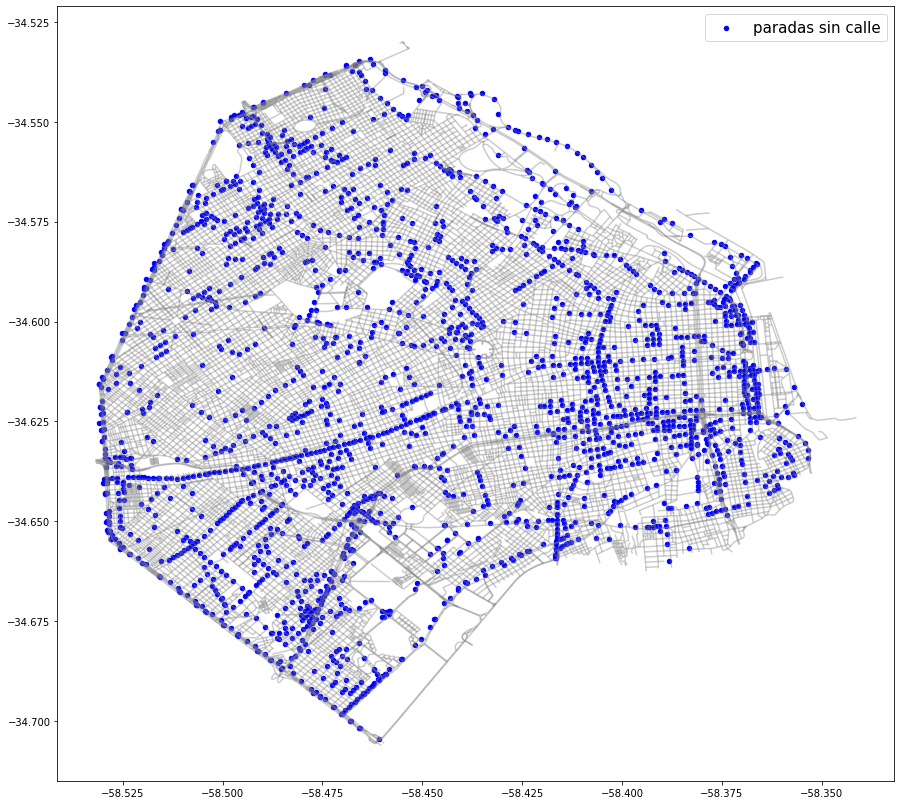

In [130]:
fig, ax = plt.subplots(figsize = (15,15))
ba_map.plot(ax = ax, alpha = 0.4, color="grey")
sin_calle.plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "paradas sin calle")
plt.legend(prop={'size': 15})

Son muchas las paradas que no tienen calle. Veremos cuántas tienen descripción.

In [89]:
sin_calle[sin_calle.STOP_DESC.isnull()]

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,...,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI,geometry


In [ ]:
df[]

Todas tienen descripción. Utilizaremos la descripción en lugar de la calle en todos esos casos.

In [179]:
df = pd.read_csv("datasets/paradas-de-colectivo.csv", delimiter=";", encoding="latin1")
df.drop_duplicates('STOP_ID', keep = 'last', inplace = True)
df.X = df.X.str.replace(",",".")
df.Y = df.Y.str.replace(",",".")
df.replace('',  np.nan, inplace=  True)
df.replace('S/N', np.nan, inplace=True)

print(len(df))







8345


In [180]:
df['SIN_CALLE'] =  df.CALLE.isnull()
df.head(2)

,X,Y,STOP_ID,TIPO,CALLE,NUMERO,ENTRE1,ENTRE2,LINEAS,DIR_NORM,...,ALTURA_NOR,COORDX,COORDY,METROBUS,STOP_NAME,STOP_DESC,FUENTE,VERIFICADA,FECHA_ULTI,SIN_CALLE
0,-58.4327908137487,-34.5923809470,1000086,PARADAS CON REFUGIO,CORDOBA AV.,4859,ARMENIA,GURRUCHAGA,"{151,168}",CORDOBA AV. 4859,...,4859.0,102.798.829.931.999.000.000,104.091.825.983.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,9/4/2015,False
1,-58.5140298647844,-34.6016371880,1005465,PARADA NO OFICIAL,NUEVA YORK,4224,NaN,GUALEGUAYCHU,{105},NUEVA YORK 4224,...,4224.0,95.346.600.539.799.900.000,103.064.210.534.000.000.000,F,NaN,NaN,RELEVAMIENTO2015,T,17/4/2015,False


In [182]:
filas = []

# Separa cada parada en una fila nueva por línea que pasa por allí.
def separar_fila(fila, filas_nuevas):
    lineas = fila.LINEAS[1:-1].split(',')
    for linea in lineas:
        dire = str(fila.STOP_DESC).replace('&&', ' y ') +" sobre el metrobus"
        if not(fila.SIN_CALLE):
            dire = str(fila.CALLE) + ' '+ str(fila.NUMERO)    
        fila_nueva = {'STOP_ID': fila.STOP_ID, 'LINEA': linea, 'DIRE': dire, 'RAMAL': fila.RAMAL}
        filas_nuevas.append(fila_nueva)

df.apply(separar_fila, axis=1, args=(filas,))
lineas_por_parada = pd.DataFrame(filas)

lineas_por_parada.head(2)



AttributeError: ("'Series' object has no attribute 'RAMAL'", 'occurred at index 0')

me fijo una parada del metrobus

In [141]:
lineas_por_parada[lineas_por_parada.STOP_ID ==20427]

,DIRE,LINEA,STOP_ID
18,CABILDO AV. y RAMALLO sobre el metrobus,168,20427
19,CABILDO AV. y RAMALLO sobre el metrobus,184,20427
20,CABILDO AV. y RAMALLO sobre el metrobus,60,20427


In [171]:
NOT_LINEA = lineas_por_parada.iloc[[33]]

In [174]:
NOT_LINEA.LINEA == ''

33    True
Name: LINEA, dtype: bool

In [176]:
lineas_por_parada =lineas_por_parada[lineas_por_parada.LINEA != '']

In [177]:
lineas_por_parada[['DIRE', 'LINEA', 'STOP_ID' ]].to_csv('datasets/lineas_por_parada.csv', index=False)


In [178]:
df = pd.read_csv("datasets/lineas_por_parada.csv", delimiter=",", encoding="latin1")
df.head(5)

,DIRE,LINEA,STOP_ID
0,CORDOBA AV. 4859,151,1000086
1,CORDOBA AV. 4859,168,1000086
2,NUEVA YORK 4224,105,1005465
3,DEL LIBERTADOR AV. 6250,15,1002096
4,DEL LIBERTADOR AV. 6250,29,1002096
